In [1]:
# Import neccesary modules and libraries
from glob import glob
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import os
import spacy
from spacy import displacy
!spacy download en_core_web_sm
!spacy download nl_core_news_sm
!spacy download de_core_news_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------ --------------------------------- 2.1/12.8 MB 11.8 MB/s eta 0:00:01
     ------------- -------------------------- 4.2/12.8 MB 10.5 MB/s eta 0:00:01
     ------------------ --------------------- 5.8/12.8 MB 9.8 MB/s eta 0:00:01
     ---------------------- ----------------- 7.1/12.8 MB 8.7 MB/s eta 0:00:01
     --------------------------- ------------ 8.7/12.8 MB 8.3 MB/s eta 0:00:01
     ------------------------------- -------- 10.2/12.8 MB 8.2 MB/s eta 0:00:01
     -------------------------------------- - 12.3/12.8 MB 8.4 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 7.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------ --------------------------------- 2.1/12.8 MB 10.7 MB/s eta 0:00:02
     ------------- -----------------

In [2]:
# read the contents of the files
def read_file(filename):
    with open(filename, encoding='utf8') as infile:
        contents = infile.read()
    return contents

corpus = {}
for filename in glob('Part_I_1-2/*.txt'):
    corpus[filename] = read_file(filename)

In [3]:
# Tokenization and word frequency analysis
word_frequencies = {}  # Store word frequency per file
total_word_freq = Counter()  # Store overall frequency
all_tokens = {}

for filename, text in corpus.items():
    sentences = sent_tokenize(text)  # Sentence tokenization
    tokens = word_tokenize(text)  # Word tokenization
    tokens = [token.lower() for token in tokens if token.isalpha()]

    all_tokens[filename] = tokens
    word_count = Counter(tokens)
    word_frequencies[filename] = word_count
    total_word_freq.update(word_count)

In [4]:
word_frequencies

{'Part_I_1-2\\01.txt': Counter({'the': 17,
          'her': 12,
          'river': 11,
          'missy': 10,
          'a': 10,
          'and': 9,
          'to': 8,
          'was': 7,
          'on': 7,
          'it': 6,
          'maps': 5,
          'she': 5,
          'at': 5,
          'that': 4,
          'over': 4,
          's': 4,
          'sitting': 3,
          'chair': 3,
          'had': 3,
          'placing': 3,
          'in': 2,
          'house': 2,
          'map': 2,
          'out': 2,
          'of': 2,
          'people': 2,
          'own': 2,
          'this': 2,
          'looked': 2,
          'smiled': 2,
          'still': 2,
          'place': 2,
          'smiles': 2,
          'leans': 2,
          'kiss': 2,
          'smile': 2,
          'table': 2,
          'cup': 2,
          'coffee': 2,
          'or': 2,
          'little': 2,
          'turned': 2,
          'another': 1,
          'plot': 1,
          'papers': 1,
          'spread': 1,
 

In [5]:
total_word_freq

Counter({'the': 329,
         'you': 307,
         'to': 238,
         'she': 214,
         'her': 191,
         'and': 176,
         'he': 141,
         'a': 140,
         'your': 122,
         'was': 115,
         'of': 109,
         'it': 104,
         'in': 88,
         'that': 88,
         'doctor': 83,
         't': 82,
         'i': 81,
         'his': 59,
         'with': 58,
         'but': 55,
         'for': 55,
         'him': 49,
         'had': 47,
         'on': 46,
         'at': 46,
         'rose': 46,
         'as': 42,
         'so': 41,
         's': 40,
         'not': 39,
         'out': 35,
         'be': 34,
         'time': 32,
         'when': 31,
         'could': 29,
         'up': 29,
         'were': 28,
         'what': 28,
         'how': 28,
         'this': 27,
         'have': 27,
         'back': 27,
         'from': 26,
         'do': 25,
         'didn': 25,
         'like': 25,
         'an': 24,
         'eyes': 24,
         'just': 24,
        

In [6]:
# Function to plot top 25 words
def plot_top_25(dict, title):
    common_words = dict.most_common(25)
    words, counts = zip(*common_words)

    plt.figure(figsize=(12,6))
    plt.bar(words, counts)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

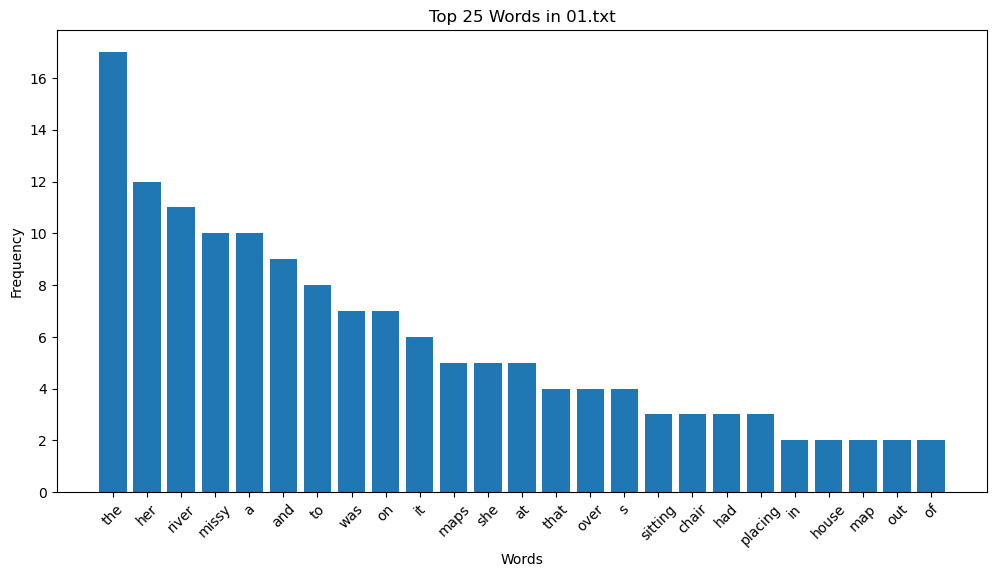

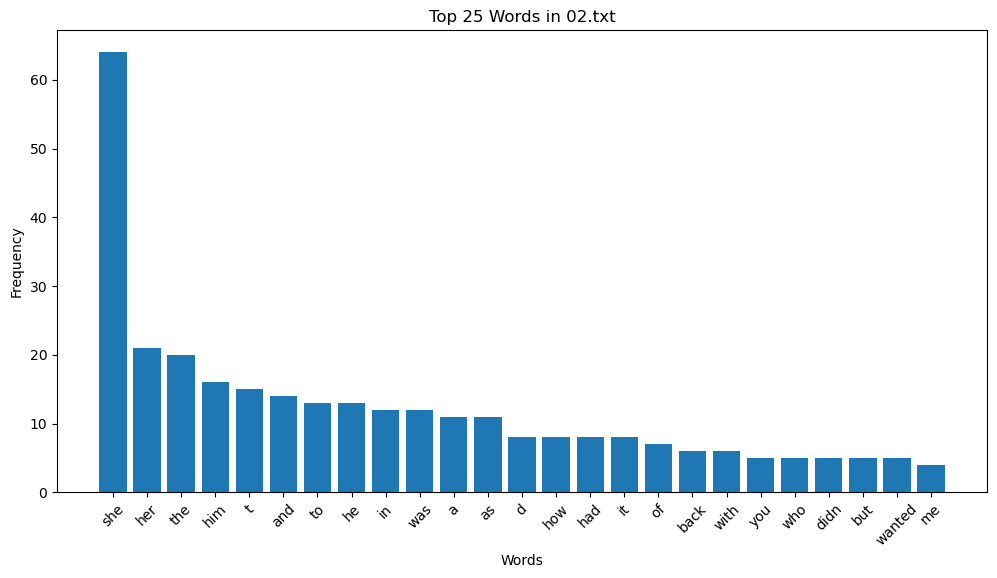

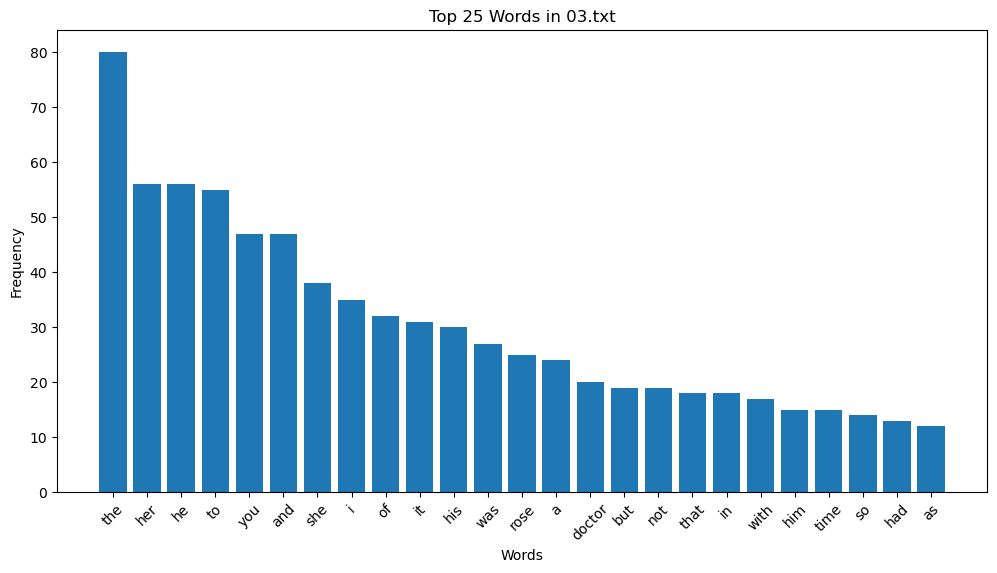

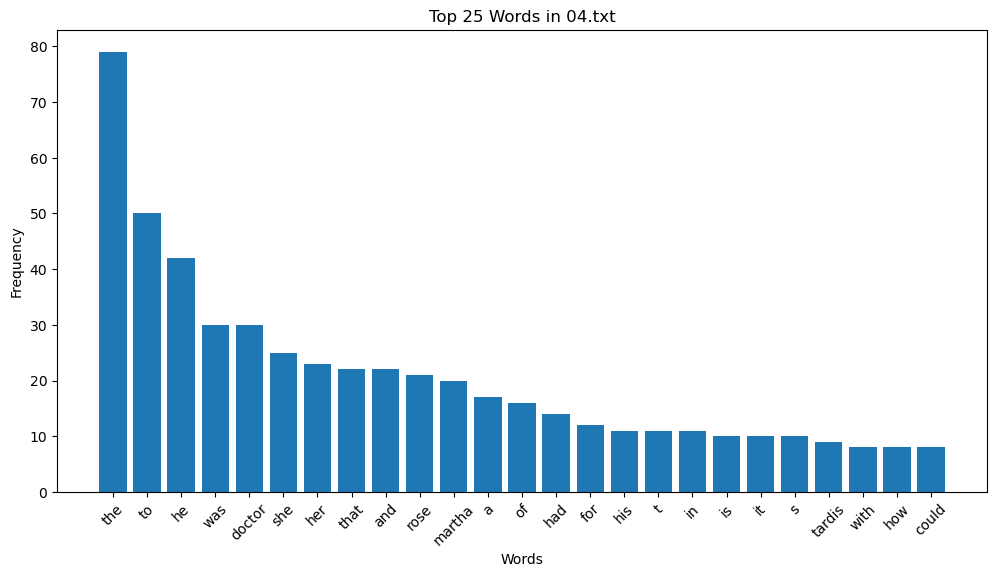

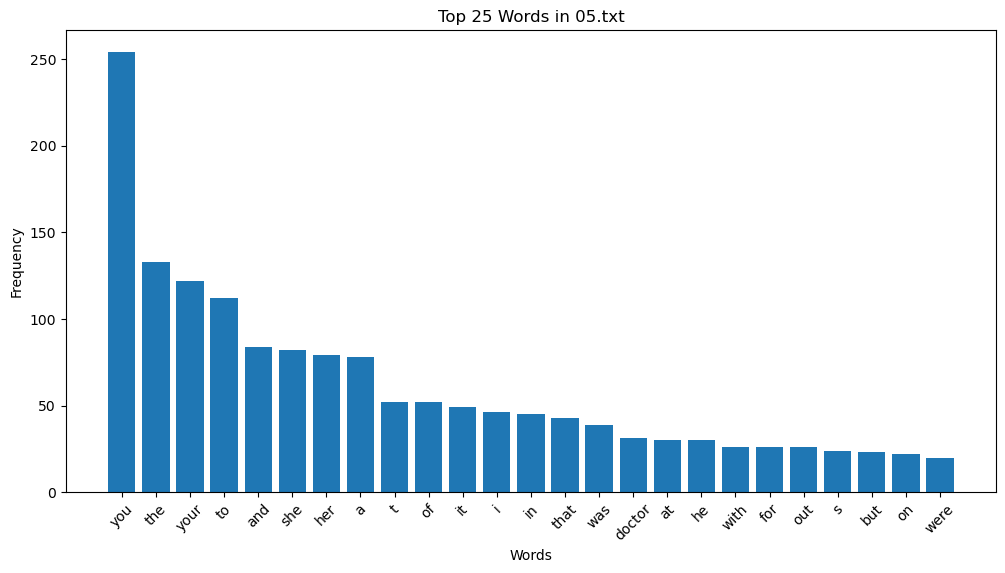

In [7]:
# Plot per story and total word frequency
for filename, word_count in word_frequencies.items():
    plot_top_25(word_count, f"Top 25 Words in {os.path.basename(filename)}")

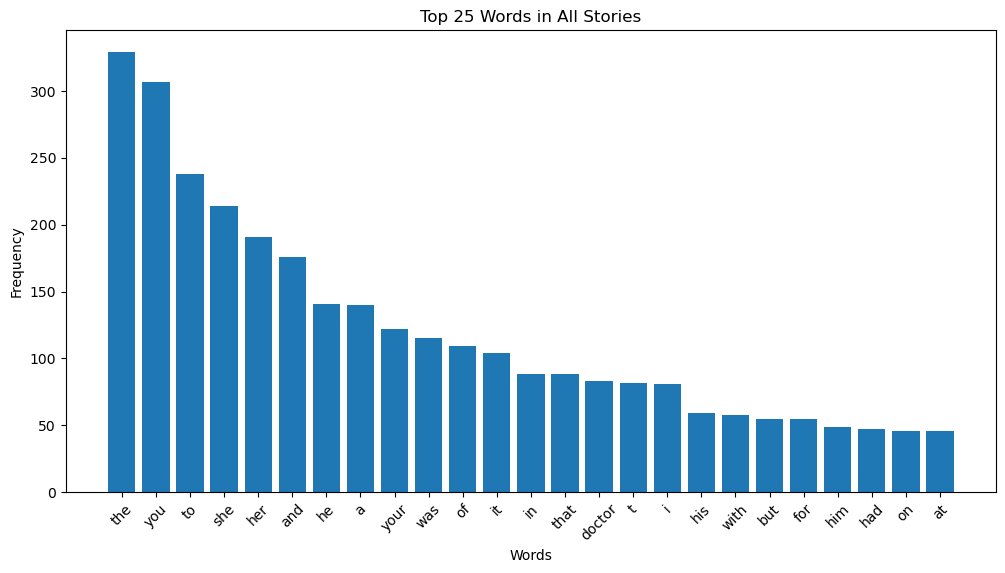

In [8]:
plot_top_25(total_word_freq, "Top 25 Words in All Stories")

In [9]:
# Initialize both stemmers
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

porter = {}  # Store Porter stemmed word frequency per file
lancaster = {}  # Store Lancaster stemmed word frequency per file
total_porter = Counter()  # Store overall frequency for Porter stemmed words
total_lancaster = Counter()  # Store overall frequency for Lancaster stemmed words

for filename, tokens in all_tokens.items():
    # Apply Porter stemming to the tokens
    porter_stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    porter_stemmed_word_count = Counter(porter_stemmed_tokens)
    porter[filename] = porter_stemmed_word_count  
    total_porter.update(porter_stemmed_word_count)  

    # Apply Lancaster stemming to the tokens
    lancaster_stemmed_tokens = [lancaster_stemmer.stem(token) for token in tokens]
    lancaster_stemmed_word_count = Counter(lancaster_stemmed_tokens)
    lancaster[filename] = lancaster_stemmed_word_count  
    total_lancaster.update(lancaster_stemmed_word_count)  

In [10]:
porter

{'Part_I_1-2\\01.txt': Counter({'the': 17,
          'her': 12,
          'river': 11,
          'missi': 10,
          'a': 10,
          'and': 9,
          'to': 8,
          'wa': 7,
          'on': 7,
          'map': 7,
          'it': 6,
          'smile': 6,
          'she': 5,
          'look': 5,
          'at': 5,
          'place': 5,
          'that': 4,
          'over': 4,
          's': 4,
          'sit': 3,
          'chair': 3,
          'had': 3,
          'cup': 3,
          'in': 2,
          'hous': 2,
          'normal': 2,
          'out': 2,
          'of': 2,
          'peopl': 2,
          'own': 2,
          'thi': 2,
          'still': 2,
          'point': 2,
          'lean': 2,
          'kiss': 2,
          'tabl': 2,
          'coffe': 2,
          'bit': 2,
          'or': 2,
          'littl': 2,
          'turn': 2,
          'anoth': 1,
          'plot': 1,
          'paper': 1,
          'spread': 1,
          'around': 1,
          'plan': 1,
  

In [11]:
lancaster

{'Part_I_1-2\\01.txt': Counter({'the': 17,
          'her': 12,
          'riv': 11,
          'missy': 10,
          'a': 10,
          'and': 9,
          'to': 8,
          'was': 7,
          'on': 7,
          'map': 7,
          'it': 6,
          'smil': 6,
          'she': 5,
          'look': 5,
          'at': 5,
          'plac': 5,
          'that': 4,
          'ov': 4,
          's': 4,
          'sit': 3,
          'chair': 3,
          'had': 3,
          'cup': 3,
          'in': 2,
          'hous': 2,
          'norm': 2,
          'out': 2,
          'of': 2,
          'peopl': 2,
          'own': 2,
          'thi': 2,
          'stil': 2,
          'point': 2,
          'lean': 2,
          'kiss': 2,
          'tabl': 2,
          'coff': 2,
          'bit': 2,
          'or': 2,
          'littl': 2,
          'turn': 2,
          'anoth': 1,
          'plot': 1,
          'pap': 1,
          'spread': 1,
          'around': 1,
          'plan': 1,
          'me

In [12]:
total_porter

Counter({'the': 329,
         'you': 307,
         'to': 238,
         'she': 214,
         'her': 194,
         'and': 176,
         'he': 141,
         'a': 140,
         'your': 124,
         'wa': 115,
         'of': 109,
         'it': 106,
         'in': 88,
         'that': 88,
         'doctor': 83,
         't': 82,
         'i': 81,
         'hi': 59,
         'with': 58,
         'but': 55,
         'for': 55,
         'him': 49,
         'had': 47,
         'rose': 47,
         'on': 46,
         'at': 46,
         'as': 42,
         'so': 41,
         's': 40,
         'be': 39,
         'not': 39,
         'time': 36,
         'out': 35,
         'when': 31,
         'have': 29,
         'could': 29,
         'up': 29,
         'smile': 28,
         'back': 28,
         'were': 28,
         'what': 28,
         'eye': 28,
         'how': 28,
         'thi': 27,
         'do': 27,
         'from': 26,
         'like': 26,
         'look': 25,
         'hand': 25,
         

In [13]:
total_lancaster

Counter({'the': 329,
         'you': 307,
         'to': 238,
         'she': 214,
         'her': 197,
         'and': 176,
         'he': 141,
         'a': 140,
         'yo': 124,
         'was': 115,
         'of': 109,
         'it': 106,
         'in': 88,
         'that': 88,
         'doct': 83,
         't': 82,
         'i': 81,
         'on': 77,
         'his': 59,
         'with': 58,
         'but': 55,
         'for': 55,
         'him': 49,
         'had': 47,
         'at': 47,
         'ros': 47,
         'not': 45,
         'as': 42,
         'so': 41,
         's': 40,
         'tim': 36,
         'out': 35,
         'wer': 35,
         'be': 34,
         'when': 31,
         'hav': 29,
         'could': 29,
         'up': 29,
         'smil': 28,
         'back': 28,
         'what': 28,
         'ey': 28,
         'how': 28,
         'thi': 27,
         'from': 26,
         'lik': 26,
         'look': 25,
         'hand': 25,
         'do': 25,
         'didn': 2

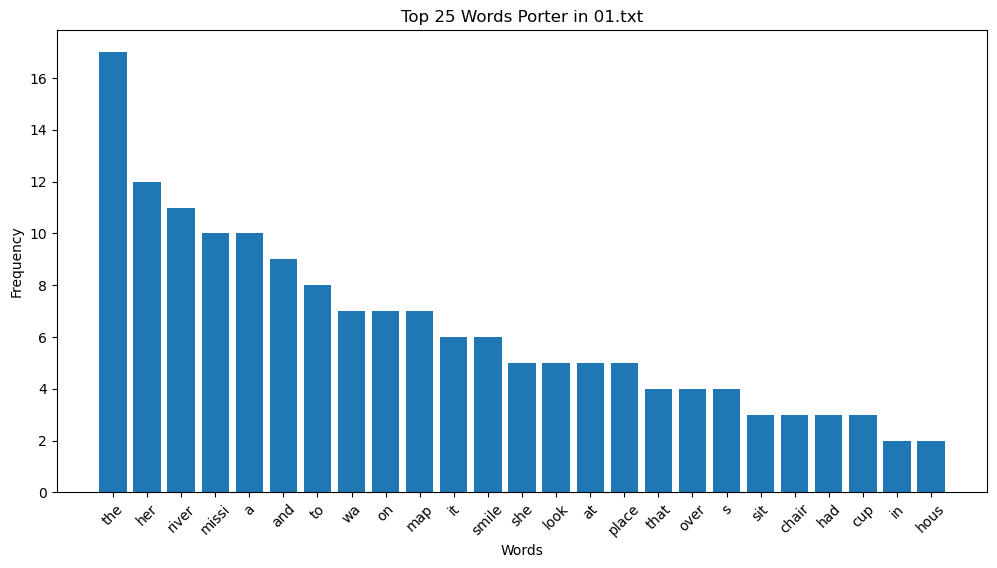

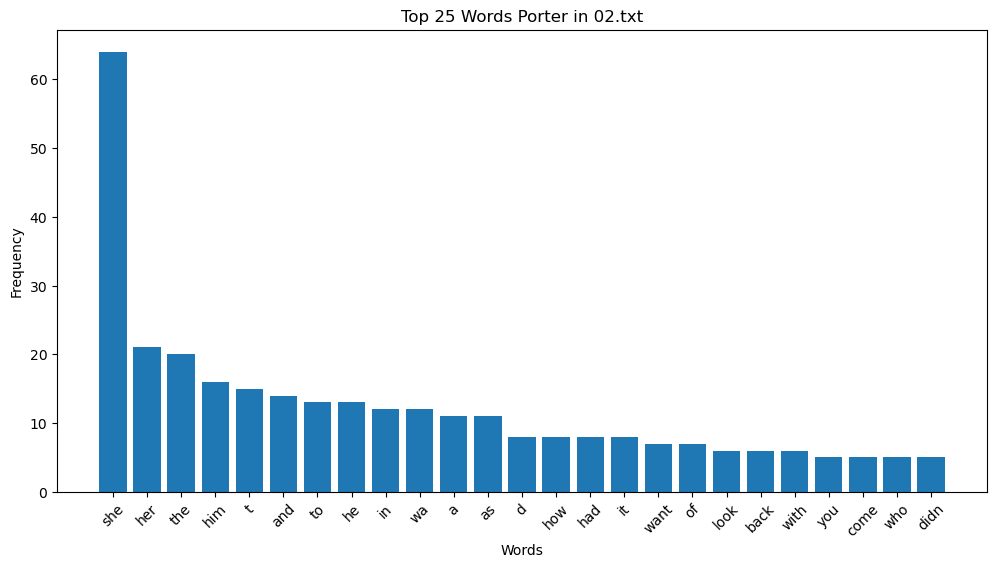

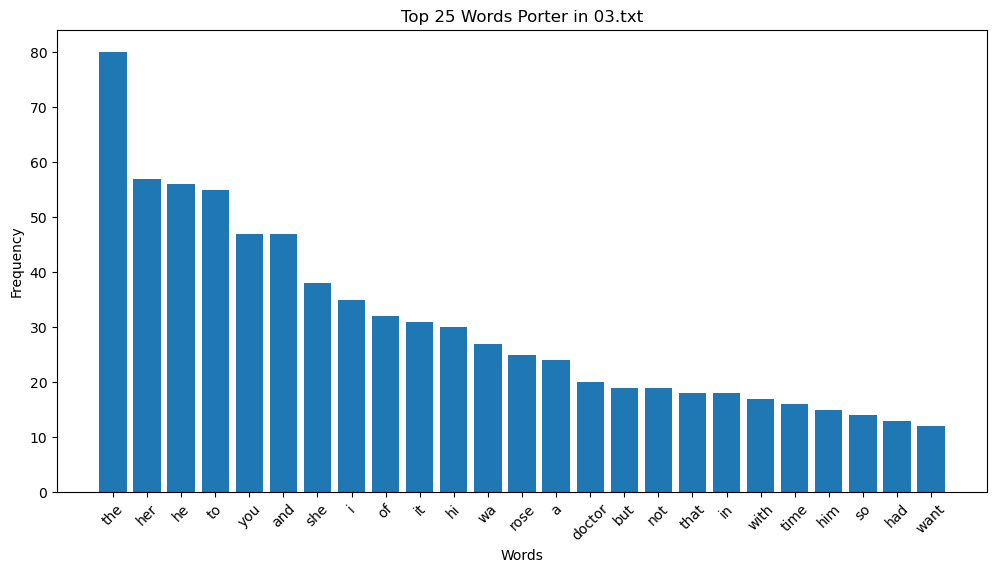

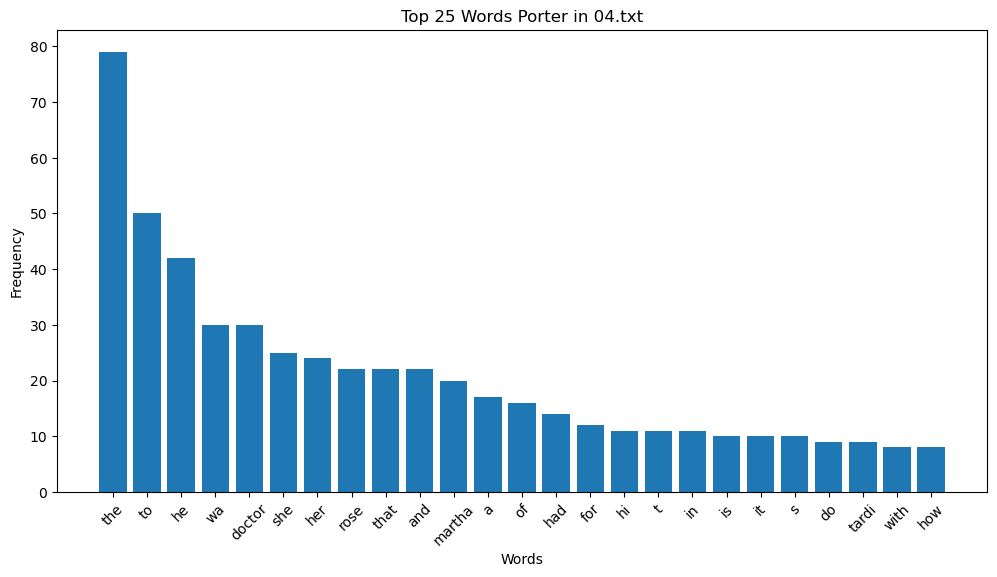

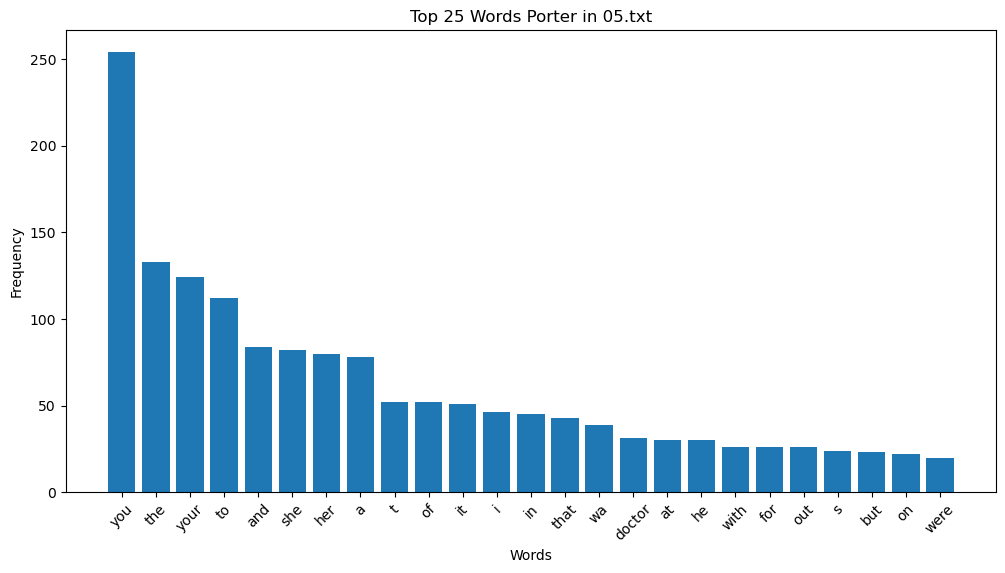

In [14]:
for filename, word_count in porter.items():
    plot_top_25(word_count, f"Top 25 Words Porter in {os.path.basename(filename)}")

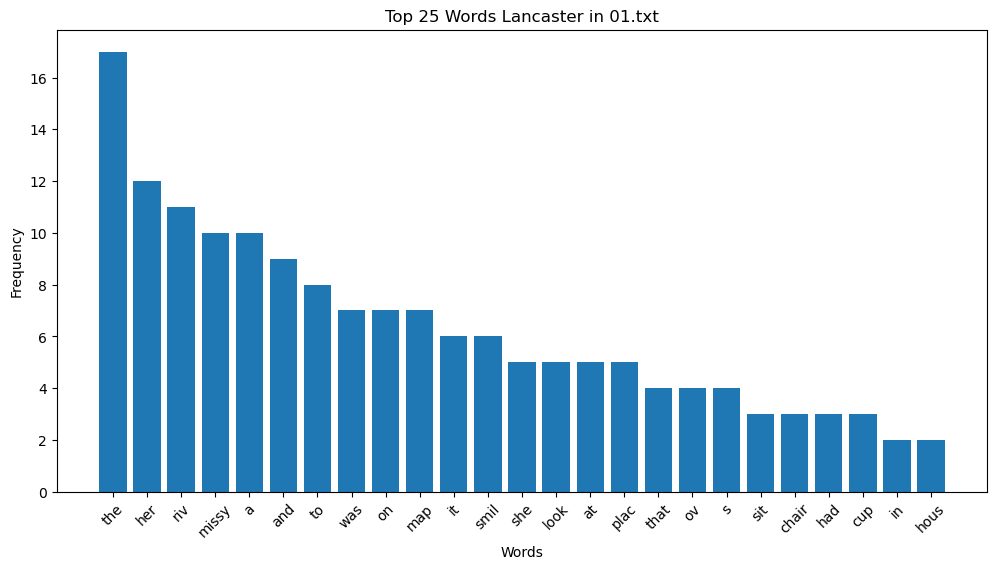

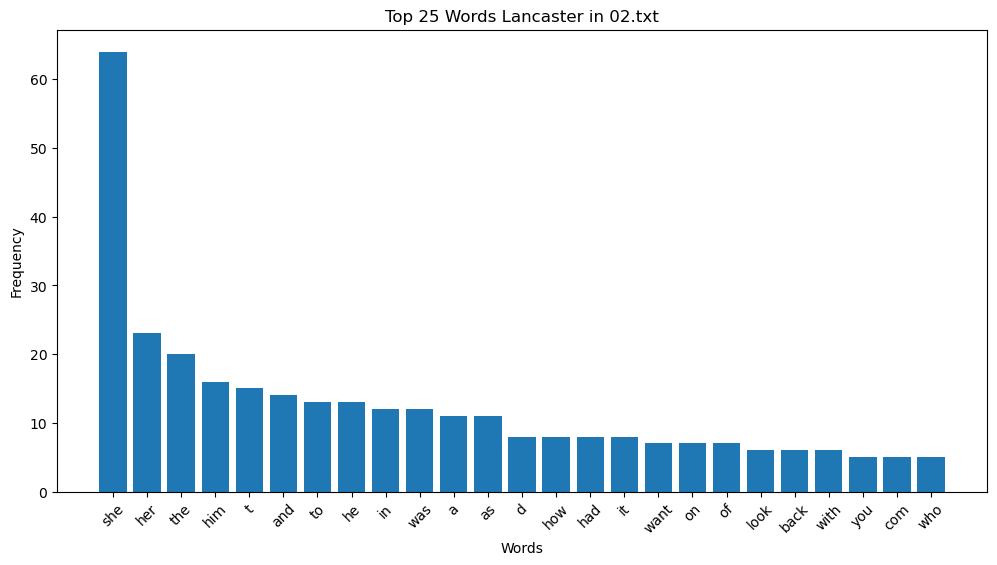

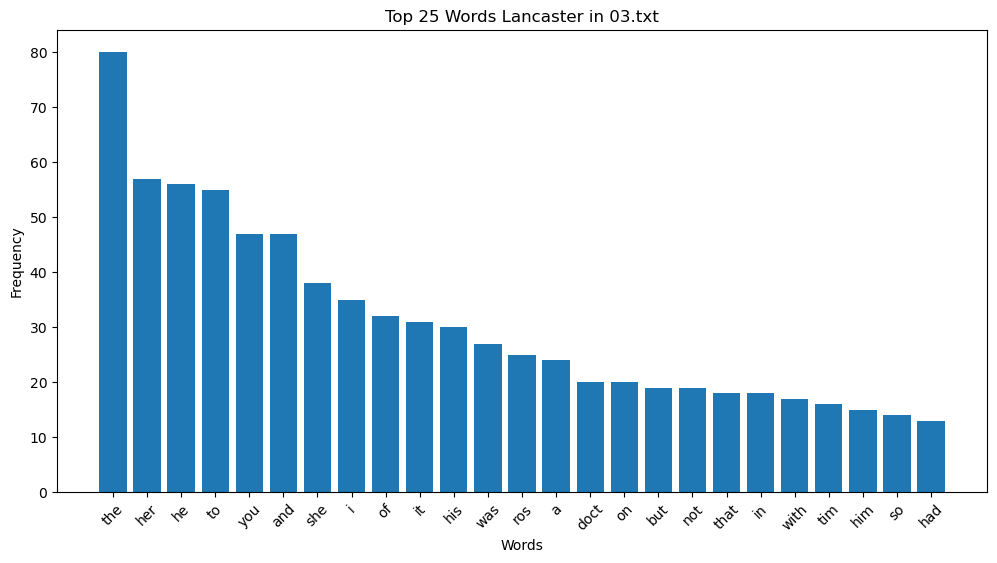

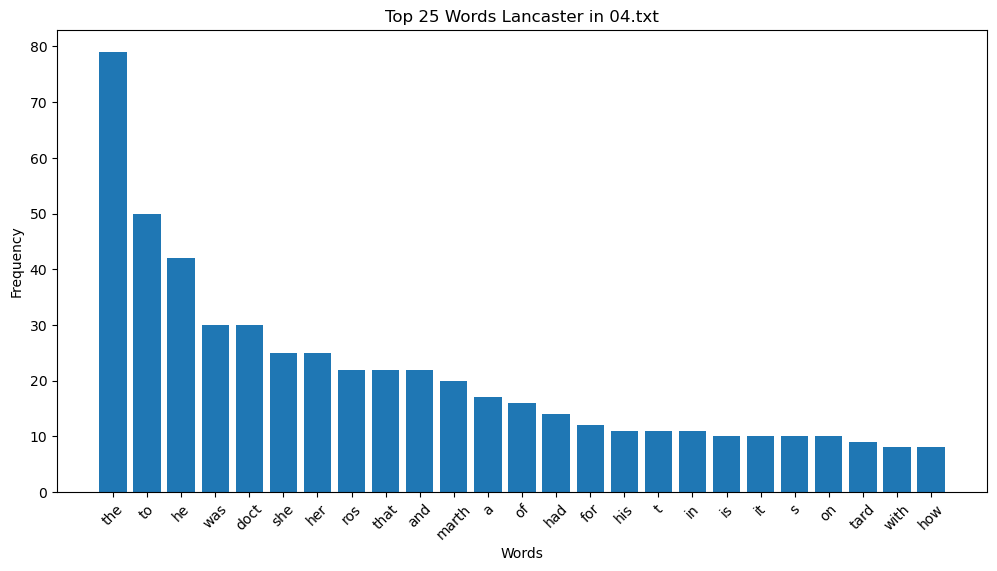

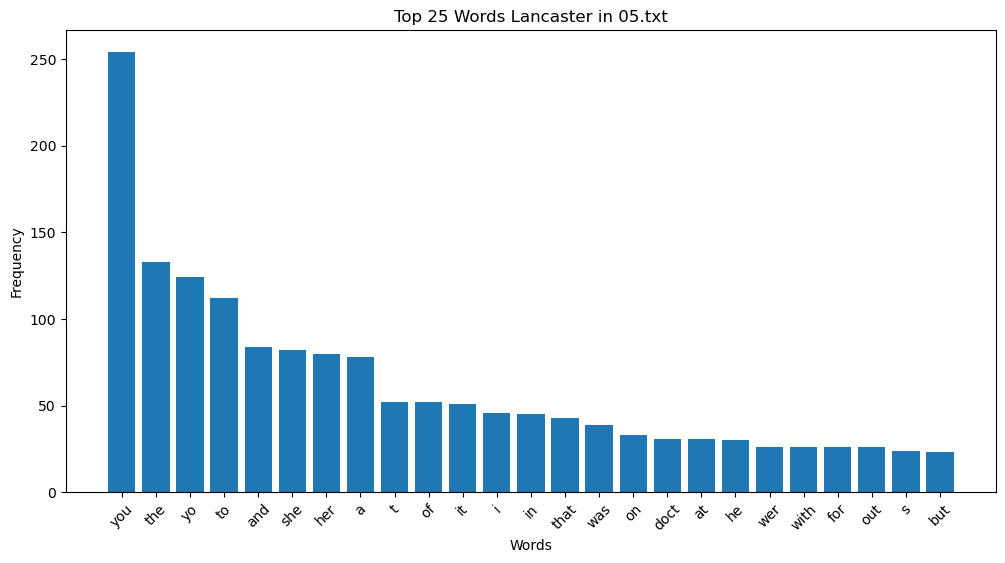

In [15]:
for filename, word_count in lancaster.items():
    plot_top_25(word_count, f"Top 25 Words Lancaster in {os.path.basename(filename)}")

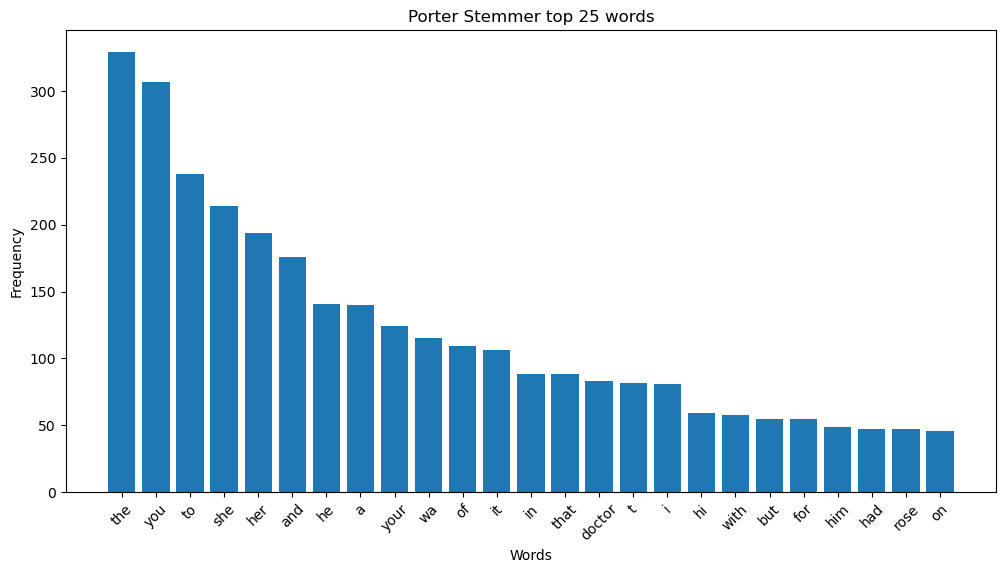

In [16]:
plot_top_25(total_porter, f"Porter Stemmer top 25 words")

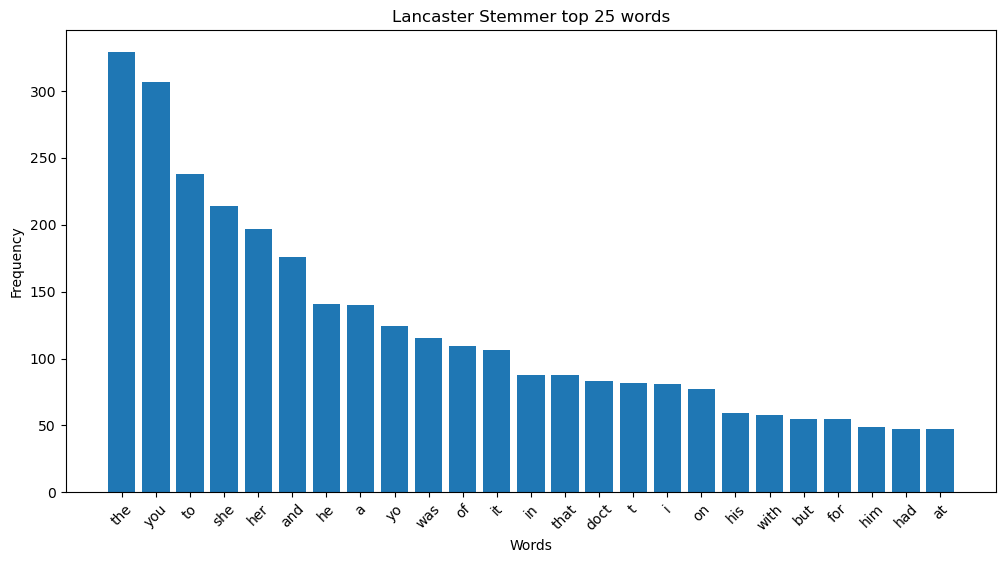

In [17]:
plot_top_25(total_lancaster, f"Lancaster Stemmer top 25 words")

In [18]:
# Function to read files
def read_file(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
    return text

In [19]:
file_path = "Part_I_3/pg74.txt"
text = read_file(file_path)

# Split text to filter out preface etc
text = text.split("PREFACE", 1)[-1] 
text = text.split("CHAPTER I", 1)[-1]
text = "CHAPTER I" + text
text = text.split("*** END OF THE PROJECT GUTENBERG", 1)[0]

english_text = text
# print to see if text is filtered correctly
english_text

'CHAPTER I\n\n\n“Tom!”\n\nNo answer.\n\n“TOM!”\n\nNo answer.\n\n“What’s gone with that boy, I wonder? You TOM!”\n\nNo answer.\n\nThe old lady pulled her spectacles down and looked over them about the\nroom; then she put them up and looked out under them. She seldom or\nnever looked _through_ them for so small a thing as a boy; they were\nher state pair, the pride of her heart, and were built for “style,” not\nservice—she could have seen through a pair of stove-lids just as well.\nShe looked perplexed for a moment, and then said, not fiercely, but\nstill loud enough for the furniture to hear:\n\n“Well, I lay if I get hold of you I’ll—”\n\nShe did not finish, for by this time she was bending down and punching\nunder the bed with the broom, and so she needed breath to punctuate the\npunches with. She resurrected nothing but the cat.\n\n“I never did see the beat of that boy!”\n\nShe went to the open door and stood in it and looked out among the\ntomato vines and “jimpson” weeds that consti

In [20]:
file_path = "Part_I_3/pg30165.txt"
text = read_file(file_path)

text = text.split("Erstes Kapitel", 1)[-1]
text = "Erstes Kapitel" + text
text = text.split("*** END OF THE PROJECT GUTENBERG", 1)[0]

german_text = text
german_text

'Erstes Kapitel.\n\n,,Tom!"\n\nKeine Antwort.\n\n,,Tom!"\n\nAlles still.\n\n,,Soll mich doch wundern, wo der Bengel wieder steckt! Tom!"\n\nDie alte Dame schob ihre Brille hinunter und schaute darüber hinweg; dann\nschob sie sie auf die Stirn und schaute darunter weg. Selten oder nie\nschaute sie nach einem so kleinen Ding, wie ein Knabe ist, _durch_ die\nGläser dieser ihrer Staatsbrille, die der Stolz ihres Herzens war und mehr\nstilvoll als brauchbar; sie würde durch ein paar Herdringe ebensoviel\ngesehen haben. Unruhig hielt sie einen Augenblick Umschau und sagte, nicht\ngerade erzürnt, aber doch immer laut genug, um im ganzen Zimmer gehört zu\nwerden: ,,Ich werde strenges Gericht halten müssen, wenn ich dich erwische,\nich werde --"\n\nHier brach sie ab, denn sie hatte sich inzwischen niedergebeugt und\nstocherte mit dem Besen unter dem Bett herum, und dann mußte sie wieder\nAtem holen, um ihrem Ärger Ausdruck zu verleihen. Sie hatte nichts als die\nKatze aufgestöbert.\n\n,,So ein 

In [21]:
file_path = "Part_I_3/pg18381.txt"
text = read_file(file_path)

text = text.split("HOOFDSTUK I", 1)[-1]
text = "HOOFDSTUK I" + text
text = text.split("*** END OF THE PROJECT GUTENBERG", 1)[0]

dutch_text = text
dutch_text

'HOOFDSTUK I.\n\n\n"Tom!"\n\nGeen antwoord.\n\n"Tom!"\n\nGeen antwoord.\n\n"Waar zou die drommelsche jongen toch zitten? Hoor je me niet, Tom?"\n\nDe oude dame, die deze woorden sprak, trok haar bril naar beneden\nom er overheen te kijken. Daarna duwde zij hem naar boven om er\nonderdoor te kijken. Zelden of nooit gebruikte zij hem om er _door_\nte kijken, althans niet naar een zoo onbeduidend voorwerp als een\nkleine jongen. Immers haar bril was haar roem, de trots van haar hart,\nen zij had hem gekocht om ontzag in te boezemen,--niet om dienst te\ndoen. Voor hare oogen toch kon zij evengoed een deksel van een sauspan\ngenomen hebben. Een oogenblik zag zij onthutst in het rond en zeide,\nniet bepaald barsch, maar luid genoeg om door al de meubelen in de\nkamer gehoord te worden:\n\n"Als ik je krijg, dan zal...."\n\nMeer kon zij niet uitbrengen, want al pratende had zij zich\nvoorovergebukt om met een bezem onder het bed te voelen of zich daar\nook iemand verscholen had; en zij hijgde 

In [22]:
# Load nlp models
nlp_en = spacy.load("en_core_web_sm")
nlp_nl = spacy.load("nl_core_news_sm")
nlp_de = spacy.load("de_core_news_sm")     

# Function to return POS frequencies
def get_pos_frequencies(text, nlp_model):
    doc = nlp_model(text)  # Process the text
    pos_counts = Counter(token.pos_ for token in doc)  # Count POS occurrences
    return pos_counts

# Apply POS tagging and count frequencies
pos_counts_en = get_pos_frequencies(english_text, nlp_en)
pos_counts_de = get_pos_frequencies(german_text, nlp_de)
pos_counts_nl = get_pos_frequencies(dutch_text, nlp_nl)

# Print results
print("English POS Frequencies:", pos_counts_en)
print("German POS Frequencies:", pos_counts_de)
print("Dutch POS Frequencies:", pos_counts_nl)

English POS Frequencies: Counter({'PUNCT': 15310, 'NOUN': 12144, 'VERB': 11292, 'PRON': 10268, 'ADP': 7258, 'DET': 6856, 'SPACE': 6394, 'ADV': 4883, 'ADJ': 4404, 'AUX': 4377, 'CCONJ': 3840, 'PROPN': 3010, 'PART': 2085, 'SCONJ': 1805, 'NUM': 639, 'INTJ': 475, 'X': 73, 'SYM': 1})
German POS Frequencies: Counter({'PUNCT': 18397, 'NOUN': 11099, 'VERB': 9468, 'ADV': 9266, 'PRON': 8771, 'DET': 7449, 'SPACE': 6631, 'ADP': 5268, 'AUX': 3740, 'CCONJ': 3356, 'ADJ': 2914, 'PROPN': 2181, 'PART': 1679, 'SCONJ': 1514, 'NUM': 309, 'X': 221, 'INTJ': 208})
Dutch POS Frequencies: Counter({'PUNCT': 13947, 'NOUN': 11920, 'VERB': 11768, 'PRON': 10021, 'ADP': 8793, 'SPACE': 7217, 'DET': 7114, 'ADV': 5761, 'ADJ': 5048, 'AUX': 3839, 'CCONJ': 3503, 'PROPN': 3474, 'SCONJ': 1999, 'NUM': 391, 'INTJ': 365, 'SYM': 353, 'X': 23})


In [23]:
# Create a DataFrame for better readability
df = pd.DataFrame([pos_counts_en, pos_counts_de, pos_counts_nl], 
                  index=['English','German', 'Dutch']).fillna(0)
print(df)

         PROPN   PRON  SPACE  PUNCT   DET   NOUN   AUX   VERB   ADP    X  \
English   3010  10268   6394  15310  6856  12144  4377  11292  7258   73   
German    2181   8771   6631  18397  7449  11099  3740   9468  5268  221   
Dutch     3474  10021   7217  13947  7114  11920  3839  11768  8793   23   

          ADJ  CCONJ   ADV    PART  SCONJ  INTJ  NUM    SYM  
English  4404   3840  4883  2085.0   1805   475  639    1.0  
German   2914   3356  9266  1679.0   1514   208  309    0.0  
Dutch    5048   3503  5761     0.0   1999   365  391  353.0  


In [24]:
# Sample sentences from each text
doc = nlp_en("She was wearing a t-shirt that drenched her form, and some trousers that looked about the right size, Missy smiled, still in her Mary Poppins looking outfit, River looked over at the maps."
"She wished it could have been him after he knew who she was, because what he was mostly talking about was 1969, she wanted to know how her parents were in New York, she wanted the more mature version of him, but she lent against him, sitting in the garden, gently pulling him up to show him the three children she had been left with, it wasn’t night yet and they were playing together."
"Rose Tyler. Rassilon, how he loved to say her name. I was going to take you to so many places. Barcelona. Not the city Barcelona, the planet Barcelona."           
"The TARDIS wasn’t meant to translate Gallifreyan to other languages. So, very early on, The Doctor had adjusted some things so she could translate Gallifreyan to English. The system had to be repaired regularly, but it was worth it for people like Rose."
"You met his kind with the Doctor a few months back. They were called Torwash or Torvash, you weren’t sure. You may or may not have set off a couple of explosives to blow up their building on planet Serentara, ruining their plans to enslave its population."
            )

# Perform named entity recognition
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Missy 102 107 PERSON
Mary Poppins 129 141 PERSON
River 158 163 LOC
1969 294 298 DATE
New York 343 351 GPE
three 483 488 CARDINAL
Rose Tyler 573 583 PERSON
Barcelona 668 677 GPE
Barcelona 692 701 GPE
Barcelona 714 723 GPE
TARDIS 728 734 ORG
Gallifreyan 761 772 PERSON
Gallifreyan 871 882 PRODUCT
English 886 893 LANGUAGE
Rose 972 976 PERSON
a few months back 1010 1027 DATE
Torwash or Torvash 1046 1064 WORK_OF_ART
Serentara 1175 1184 PERSON


In [26]:
# Display entities in text
displacy.render(doc, style="ent")

Manual annotation:
She was wearing a t-shirt that drenched her form, and some trousers that looked about the right size, 
[Missy]_PER smiled, still in her [Mary Poppins]_WORK_OF_ART looking outfit, [River]_PER looked over at the maps.

She wished it could have been him after he knew who she was, because what he was mostly talking about was [1969]_DATE, 
she wanted to know how her parents were in [New York]_GPE, she wanted the more mature version of him, but she lent against him, 
sitting in the garden, gently pulling him up to show him the [three]_CARDINAL children she had been left with, it wasn’t night yet and they were playing together.
    
[Rose Tyler]_PER. [Rassilon]_PER, how he loved to say her name. I was going to take you to so many places. [Barcelona]_LOC. Not the city [Barcelona]_GPE, the planet [Barcelona]_LOC.
    
The [TARDIS]_PRODUCT wasn’t meant to translate [Gallifreyan]_LANGUAGE to other languages. So, very early on, [The Doctor]_PER had adjusted some things so she could 
translate [Gallifreyan]_LANGUAGE to [English]_LANGUAGE. The system had to be repaired regularly, but it was worth it for people like [Rose]_PER.
    
You met his kind with [the Doctor]_PER [a few months back]_DATE. They were called [Torwash or Torvash]_NORP, you weren’t sure. 
You may or may not have set off a couple of explosives to blow up their building on planet [Serentara]_LOC, ruining their plans to enslave its population.     

In [25]:
# Report accuracy of automatic NER
TP = 9
FP = 9
FN = 3

Precision = TP/(TP+FP) 
Recall = TP/(TP+FN)
F1_Score = 2*((Precision*Recall)/(Precision+Recall)) 

print("Precision:", Precision, "\nRecall:", Recall, "\nF1-Score:", F1_Score)

Precision: 0.5 
Recall: 0.75 
F1-Score: 0.6
